In [1]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
dataframe = pd.read_csv('C:/Users/Fizza Nawaz/Downloads/zameen-updated.csv')

In [3]:
dataframe  # checking for null values -> no null values

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168441,17355248,6754,https://www.zameen.com/Property/gulshan_e_maym...,House,26500000,Gadap Town,Karachi,Sindh,25.029909,67.137192,0,9.6 Marla,For Sale,6,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,9.6,5-10 Marla
168442,17355249,680,https://www.zameen.com/Property/gadap_town_gul...,House,12500000,Gadap Town,Karachi,Sindh,25.017951,67.136393,0,8 Marla,For Sale,3,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,8.0,5-10 Marla
168443,17355250,6757,https://www.zameen.com/Property/gulshan_e_maym...,House,27000000,Gadap Town,Karachi,Sindh,25.015384,67.116330,0,9.6 Marla,For Sale,6,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,9.6,5-10 Marla
168444,17355251,6752,https://www.zameen.com/Property/gulshan_e_maym...,House,11000000,Gadap Town,Karachi,Sindh,25.013265,67.120818,0,7.8 Marla,For Sale,3,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,7.8,5-10 Marla


In [4]:
dataframe.isnull().sum() # sum of null values

property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
area                 0
purpose              0
bedrooms             0
date_added           0
agency           44071
agent            44072
Area Type            0
Area Size            0
Area Category        0
dtype: int64

In [5]:
# missing_data = dataframe[dataframe.isnull().any(axis = 1)]
# missing_data # this is returning all the rows that contain atlest one missing value -> agency , agent = NAN

In [6]:
price_col = dataframe.pop('price')
dataframe['price'] = price_col       # moved price column to the last

In [7]:
# drop 'page_url' column
dataframe = dataframe.drop(['page_url'], axis = 1)

In [8]:
# dropping these cols bcz they contain null (NAN) data
# dataframe = dataframe.drop(['agency', 'agent'], axis = 1)  

# or I can find mean and fill the missing values
agency_mode = dataframe['agency'].mode()[0]
agent_mode = dataframe['agent'].mode()[0]

dataframe['agency'].fillna(agency_mode, inplace=True)
dataframe['agent'].fillna(agent_mode, inplace=True)

In [9]:
print(agency_mode + '\n' + agent_mode)

Real Investment Consultants
Boez Ayub


In [10]:
dataframe.shape

(168446, 19)

In [11]:
dataframe.isnull().sum() # review null values

property_id      0
location_id      0
property_type    0
location         0
city             0
province_name    0
latitude         0
longitude        0
baths            0
area             0
purpose          0
bedrooms         0
date_added       0
agency           0
agent            0
Area Type        0
Area Size        0
Area Category    0
price            0
dtype: int64

In [12]:
df_cat = dataframe.select_dtypes(object)
df_num = dataframe.select_dtypes(np.number)

In [13]:
df_cat

,property_type,location,city,province_name,area,purpose,date_added,agency,agent,Area Type,Area Category
0,Flat,G-10,Islamabad,Islamabad Capital,4 Marla,For Sale,02-04-2019,Real Investment Consultants,Boez Ayub,Marla,0-5 Marla
1,Flat,E-11,Islamabad,Islamabad Capital,5.6 Marla,For Sale,05-04-2019,Real Investment Consultants,Boez Ayub,Marla,5-10 Marla
2,House,G-15,Islamabad,Islamabad Capital,8 Marla,For Sale,07-17-2019,Real Investment Consultants,Boez Ayub,Marla,5-10 Marla
3,House,Bani Gala,Islamabad,Islamabad Capital,2 Kanal,For Sale,04-05-2019,Real Investment Consultants,Boez Ayub,Kanal,1-5 Kanal
4,House,DHA Defence,Islamabad,Islamabad Capital,8 Marla,For Sale,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,5-10 Marla
...,...,...,...,...,...,...,...,...,...,...,...
168441,House,Gadap Town,Karachi,Sindh,9.6 Marla,For Sale,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,5-10 Marla
168442,House,Gadap Town,Karachi,Sindh,8 Marla,For Sale,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,5-10 Marla
168443,House,Gadap Town,Karachi,Sindh,9.6 Marla,For Sale,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,5-10 Marla
168444,House,Gadap Town,Karachi,Sindh,7.8 Marla,For Sale,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,5-10 Marla


In [14]:
pt = dataframe['property_type'].unique()
pt_c = pt

In [15]:
loc =  dataframe['location'].unique()
loc_c = loc

In [16]:
city = dataframe['city'].unique()
city_c = city

In [17]:
pn = dataframe['province_name'].unique()
pn_c = pn

In [18]:
dataframe['area'].unique()

def convert_area(area):
    value, ptype = area.split(' ')
    if ',' in value:
        a, b = value.split(',')
        value = a+b
    value = float(value)
    if ptype == 'Marla':
        return value
    elif ptype == 'Kanal':
        return value * 20

dataframe['area'] = dataframe['area'].apply(convert_area)

# print(dataframe['area'])        

In [19]:
pur = dataframe['purpose'].unique()
pur_c = pur

In [20]:
dataframe['date_added'].unique()

def convert_date(date):
    day, month, year = date.split('-')
    date = day+month+year
    return float(date)

dataframe['date_added'] = dataframe['date_added'].apply(convert_date)

In [21]:
agency = dataframe['agency'].unique()
agency_c = agency

In [22]:
agent = dataframe['agent'].unique()
agent_c = agent

In [23]:
at = dataframe['Area Type'].unique()
at_c = at

In [24]:
ac = dataframe['Area Category'].unique()
ac_c = ac

In [25]:
# loopover it

value_to_index = {value: index for index, value in enumerate(pt)}
dataframe['property_type'] = dataframe['property_type'].map(value_to_index)

value_to_index = {value: index for index, value in enumerate(loc)}
dataframe['location'] = dataframe['location'].map(value_to_index)

value_to_index = {value: index for index, value in enumerate(city)}
dataframe['city'] = dataframe['city'].map(value_to_index)

value_to_index = {value: index for index, value in enumerate(pn)}
dataframe['province_name'] = dataframe['province_name'].map(value_to_index)

value_to_index = {value: index for index, value in enumerate(pur)}
dataframe['purpose'] = dataframe['purpose'].map(value_to_index)

value_to_index = {value: index for index, value in enumerate(agency)}
dataframe['agency'] = dataframe['agency'].map(value_to_index)

value_to_index = {value: index for index, value in enumerate(agent)}
dataframe['agent'] = dataframe['agent'].map(value_to_index)

value_to_index = {value: index for index, value in enumerate(at)}
dataframe['Area Type'] = dataframe['Area Type'].map(value_to_index)

value_to_index = {value: index for index, value in enumerate(ac)}
dataframe['Area Category'] = dataframe['Area Category'].map(value_to_index)

In [26]:
dataframe.select_dtypes(np.number)

,property_id,location_id,property_type,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category,price
0,237062,3325,0,0,0,0,33.679890,73.012640,2,4.0,0,2,2042019.0,0,0,0,4.0,0,10000000
1,346905,3236,0,1,0,0,33.700993,72.971492,3,5.6,0,3,5042019.0,0,0,0,5.6,1,6900000
2,386513,764,1,2,0,0,33.631486,72.926559,6,8.0,0,5,7172019.0,0,0,0,8.0,1,16500000
3,656161,340,1,3,0,0,33.707573,73.151199,4,40.0,0,4,4052019.0,0,0,1,2.0,2,43500000
4,841645,3226,1,4,0,0,33.492591,73.301339,3,8.0,0,3,7102019.0,1,1,0,8.0,1,7000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168441,17355248,6754,1,73,4,2,25.029909,67.137192,0,9.6,0,6,7182019.0,3930,7074,0,9.6,1,26500000
168442,17355249,680,1,73,4,2,25.017951,67.136393,0,8.0,0,3,7182019.0,3930,7074,0,8.0,1,12500000
168443,17355250,6757,1,73,4,2,25.015384,67.116330,0,9.6,0,6,7182019.0,3930,7074,0,9.6,1,27000000
168444,17355251,6752,1,73,4,2,25.013265,67.120818,0,7.8,0,3,7182019.0,3930,7074,0,7.8,1,11000000


['Islamabad' 'Lahore' 'Faisalabad' 'Rawalpindi' 'Karachi']


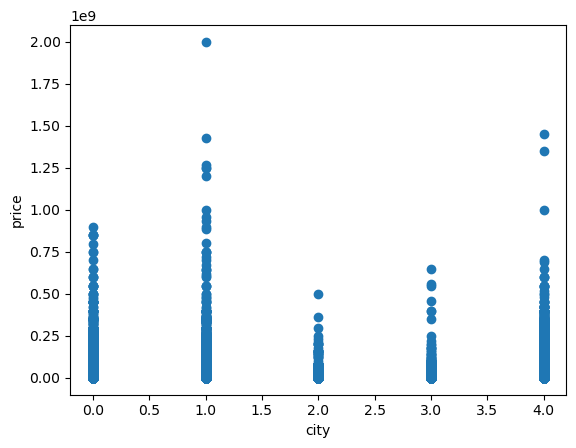

In [28]:
plt.scatter(dataframe['city'], dataframe['price'])
plt.xlabel('city')
plt.ylabel('price')
print(city_c)

['Islamabad Capital' 'Punjab' 'Sindh']


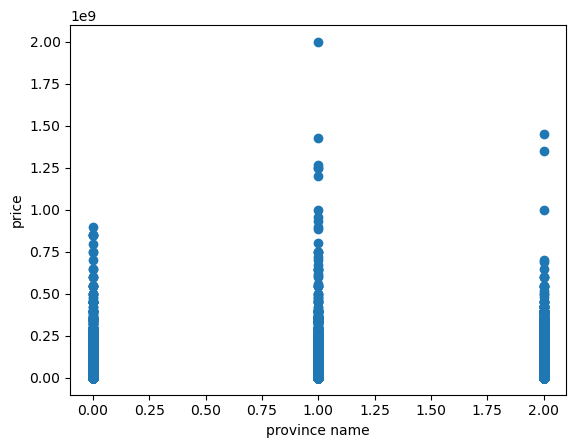

In [29]:
plt.scatter(dataframe['province_name'], dataframe['price'])
plt.xlabel('province name')
plt.ylabel('price')
print(pn_c)

Text(0, 0.5, 'price')

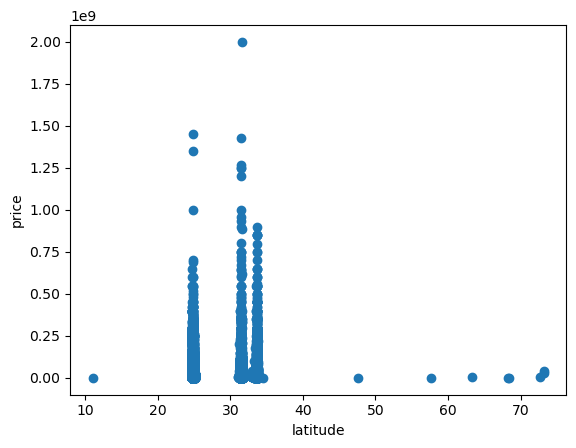

In [30]:
plt.scatter(dataframe['latitude'], dataframe['price'])
plt.xlabel('latitude')
plt.ylabel('price')

['Real Investment Consultants' 'Easy Property' 'Ettemad Enterprises' ...
 'Al Jeddah Estate Agency' 'Land Shark' 'Al Barka Property Consultant']


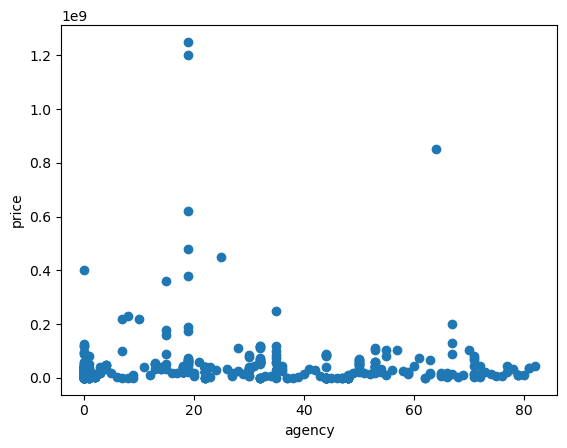

In [31]:
# didn't get it...
plt.scatter(dataframe['agency'][:500], dataframe['price'][:500])
plt.xlabel('agency')
plt.ylabel('price')
print(agency_c)

['Boez Ayub' 'Muhammad Junaid Ceo Muhammad Shahid Director'
 'Balqiaz Marwat' ... 'Ahmed Arslan' 'Muhammad Hasan, Farrukh'
 'Basit Aziz']


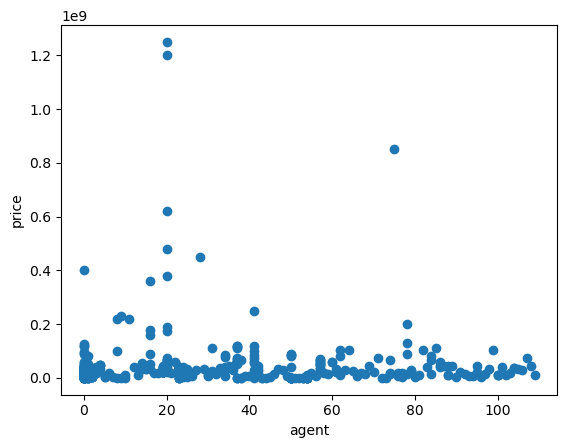

In [32]:
# out of mindr...
plt.scatter(dataframe['agent'][:500], dataframe['price'][:500])
plt.xlabel('agent')
plt.ylabel('price')
print(agent_c)

D:\Setups\Anaconda\Installation\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

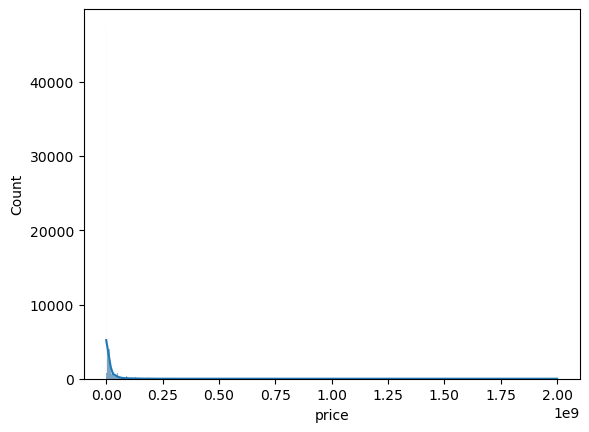

In [33]:
sn.histplot(dataframe['price'], bins='auto', kde=True)

In [34]:
# splitting data
X_train, X_test, y_train, y_test = train_test_split(dataframe.iloc[:, :-1], dataframe.iloc[:, -1:], random_state = 0, test_size = 0.3)

In [35]:
reg = linear_model.LinearRegression()

In [36]:
# train data
reg.fit(X_train, y_train)

LinearRegression()

In [37]:
# test
y_pred = reg.predict(X_test)
y_pred

array([[ 15221701.46146771],
       [ 44960703.53701057],
       [ 19661146.30224628],
       ...,
       [-23636095.89005453],
       [-18727035.47741812],
       [ 62705783.6888447 ]])

In [38]:
# Assuming y_test is your true labels and y_pred is your predicted values
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Absolute Error: 13546361.968930142
Mean Squared Error: 899719459938504.5
R² Score: 0.32436083036378727


In [39]:
correlation_matrix = dataframe.corr()
correlation_matrix

,property_id,location_id,property_type,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category,price
property_id,1.000000,0.006564,0.027806,-0.027548,-0.000131,0.006900,-0.010461,-0.002722,-0.101769,0.004077,0.036089,-0.066577,-0.016826,0.566177,0.554469,0.000234,0.002448,-0.007628,-0.029669
location_id,0.006564,1.000000,-0.114367,0.250619,0.334706,0.323104,-0.293129,-0.282903,-0.121941,-0.005619,-0.136802,-0.138452,0.003112,0.016733,0.015680,-0.243517,0.044766,-0.144555,-0.098426
property_type,0.027806,-0.114367,1.000000,0.008188,-0.124822,-0.190470,0.172088,0.099994,-0.092100,0.004148,0.445256,-0.112729,0.001104,0.023118,0.021129,0.122462,0.041931,0.156827,-0.112190
location,-0.027548,0.250619,0.008188,1.000000,-0.038915,-0.022843,0.102362,0.153851,-0.111542,-0.003024,-0.074432,-0.096328,0.012829,-0.008535,-0.032735,-0.142893,-0.012410,-0.147637,-0.091530
city,-0.000131,0.334706,-0.124822,-0.038915,1.000000,0.931164,-0.830598,-0.839331,-0.113837,-0.010043,-0.107245,-0.095631,0.023514,-0.001050,0.003614,-0.194011,0.031365,-0.095409,0.007537
province_name,0.006900,0.323104,-0.190470,-0.022843,0.931164,1.000000,-0.916667,-0.802242,-0.057024,-0.009760,-0.246643,-0.034173,0.036875,0.008821,0.012483,-0.167402,0.011728,-0.104508,0.064750
latitude,-0.010461,-0.293129,0.172088,0.102362,-0.830598,-0.916667,1.000000,0.926888,0.053107,0.008344,0.177302,0.030961,-0.037008,0.009530,0.004035,0.126117,-0.014124,0.044788,-0.071193
longitude,-0.002722,-0.282903,0.099994,0.153851,-0.839331,-0.802242,0.926888,1.000000,0.099506,0.007698,0.019892,0.079962,-0.026100,0.024522,0.017089,0.132653,-0.032820,0.012014,-0.019225
baths,-0.101769,-0.121941,-0.092100,-0.111542,-0.113837,-0.057024,0.053107,0.099506,1.000000,0.003843,-0.136562,0.669210,0.002399,-0.165652,-0.151658,0.257361,0.018705,0.242015,0.230205
area,0.004077,-0.005619,0.004148,-0.003024,-0.010043,-0.009760,0.008344,0.007698,0.003843,1.000000,0.000176,0.007143,0.001274,0.004907,0.004429,0.034594,0.142435,0.050205,0.022133


In [40]:
# cities based dataframe
city_name = 'Karachi'
city_index = 0

for i in range(len(city_c)):
    if city_c[i] == city_name:
        city_index = i
        break
        
city_spec_df = dataframe[dataframe['city'] == city_index]

In [41]:
city_spec_df

,property_id,location_id,property_type,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category,price
156,86575,6649,1,42,4,2,24.889395,67.098627,7,80.0,0,6,6202019.0,25,28,1,4.0,2,450000000
157,342005,232,1,71,4,2,24.914988,67.138702,8,16.0,0,6,7182019.0,0,0,0,16.0,5,35000000
158,466607,1484,0,4,4,2,24.814367,67.072083,3,8.9,0,3,10202018.0,0,0,0,8.9,1,21000000
159,678919,9594,1,72,4,2,24.882302,67.184677,1,3.2,0,2,3102019.0,0,0,0,3.2,0,6500000
160,813506,6732,1,73,4,2,25.018156,67.066864,4,9.6,0,4,7182019.0,0,0,0,9.6,1,13000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168441,17355248,6754,1,73,4,2,25.029909,67.137192,0,9.6,0,6,7182019.0,3930,7074,0,9.6,1,26500000
168442,17355249,680,1,73,4,2,25.017951,67.136393,0,8.0,0,3,7182019.0,3930,7074,0,8.0,1,12500000
168443,17355250,6757,1,73,4,2,25.015384,67.116330,0,9.6,0,6,7182019.0,3930,7074,0,9.6,1,27000000
168444,17355251,6752,1,73,4,2,25.013265,67.120818,0,7.8,0,3,7182019.0,3930,7074,0,7.8,1,11000000
